<a href="https://colab.research.google.com/github/yuniton/NarutoAI/blob/master/Naruto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%cd ../content/drive/My Drive/Colab Notebooks/naruto/src/naruto

/content/drive/My Drive/Colab Notebooks/naruto/src/naruto


In [0]:
#ラベリングによる学習/検証データの準備

from PIL import Image
import os, glob
import numpy as np
import random, math

#画像が保存されているルートディレクトリのパス
root_dir = "Model"
# 商品名
categories = ["ナルト","サスケ","サクラ","カカシ先生"]
# 画像データ用配列
X = []
# ラベルデータ用配列
Y = []

#画像データごとにadd_sample()を呼び出し、X,Yの配列を返す関数
def make_sample(files):
    global X, Y
    X = []
    Y = []
    for cat, fname in files:
        add_sample(cat, fname)
    return np.array(X), np.array(Y)

#渡された画像データを読み込んでXに格納し、また、
#画像データに対応するcategoriesのidxをY格納する関数
def add_sample(cat, fname):
    img = Image.open(fname)
    img = img.convert("RGB")
    img = img.resize((300, 300))
    data = np.asarray(img)
    X.append(data)
    Y.append(cat)

#全データ格納用配列
allfiles = []

#カテゴリ配列の各値と、それに対応するidxを認識し、全データをallfilesにまとめる
for idx, cat in enumerate(categories):
    image_dir = root_dir + "/" + cat
    files = glob.glob(image_dir + "/*.png")
    for f in files:
        allfiles.append((idx, f))

#シャッフル後、学習データと検証データに分ける
random.shuffle(allfiles)
th = math.floor(len(allfiles) * 0.7)
train = allfiles[0:th]
test  = allfiles[th:]
X_train, y_train = make_sample(train)
X_test, y_test = make_sample(test)
xy = (X_train, X_test, y_train, y_test)
#データを保存する（データの名前を「tea_data.npy」としている）
np.save("naruto_data.npy", xy)

In [20]:
#モデルの構築

from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(300,300,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #過学習を防ぐ
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(4,activation="sigmoid")) #分類先の種類分設定

#モデル構成の確認
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 33, 33, 128)      

In [17]:
#モデルのコンパイル



from keras import optimizers

from naruto_model import model

model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=["acc"])
#データの準備

from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix


categories = ["ナルト","サスケ","サクラ","カカシ先生"]
nb_classes = len(categories)

X_train, X_test, y_train, y_test = np.load("naruto_data.npy", allow_pickle=True)

#データの正規化
X_train = X_train.astype("float") / 255
X_test  = X_test.astype("float") / 255

#kerasで扱えるようにcategoriesをベクトルに変換
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test  = np_utils.to_categorical(y_test, nb_classes)



#モデルの学習
from preparation import X_train, y_train, X_test, y_test

model = model.fit(X_train,
                  y_train,
                  epochs=7,
                  batch_size=6,
                  validation_data=(X_test,y_test))

414720000


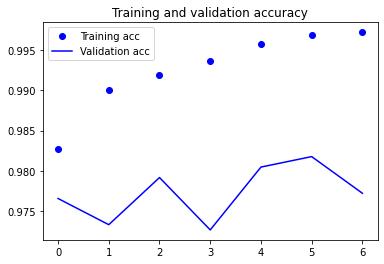

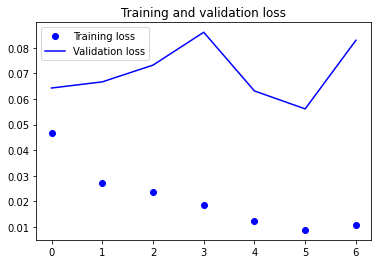

In [18]:
#学習結果を表示

import matplotlib.pyplot as plt

from model_compile import model

acc = model.history['acc']
val_acc = model.history['val_acc']
loss = model.history['loss']
val_loss = model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('naruto_accuracy_graph')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('naruto_loss_graph')

In [0]:
#モデルの保存
from model_compile import model

json_string = model.model.to_json()
open('naruto_modelResult.json', 'w').write(json_string)

#重みの保存

hdf5_file = "naruto_modelResult.hdf5"
model.model.save_weights(hdf5_file)

In [24]:
from PIL import Image
import os, glob
import numpy as np
import random, math
from tensorflow.python import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix




# 画像が保存されているディレクトリのパス


root_dir = "TEST"
# 画像が保存されているフォルダ名
categories = ["ナルト","サスケ","サクラ","カカシ先生"]

X = [] # 画像データ
Y = [] # ラベルデータ


# フォルダごとに分けられたファイルを収集
#（categoriesのidxと、画像のファイルパスが紐づいたリストを生成）
allfiles = []
for idx, cat in enumerate(categories):
    image_dir = root_dir + "/" + cat
    files = glob.glob(image_dir + "/*.png")
    for f in files:
        allfiles.append((idx, f))

for cat, fname in allfiles:
    img = Image.open(fname)
    img = img.convert("RGB")
    img = img.resize((300, 300))
    data = np.asarray(img)
    X.append(data)
    Y.append(cat)

x = np.array(X)
y = np.array(Y)


# cm = confusion_matrix(x, y)

# print(cm)



np.save("naruto_data_test_X_150.npy", x)
np.save("naruto_data_test_Y_150.npy", y)


97


In [36]:
# モデルの精度を測る

#評価用のデータの読み込み
import numpy as np

from model_compile import model
from naruto_testData import x, y

eval_X = np.load("naruto_data_test_X_150.npy")
eval_Y = np.load("naruto_data_test_Y_150.npy")



#Yのデータをone-hotに変換
from keras.utils import np_utils

test_Y = np_utils.to_categorical(eval_Y,4)


score = model.model.evaluate(x=eval_X,y=test_Y)


print('loss=', score[0])
print('accuracy=', score[1])



26190000
97/97 [==============================] - 0s 3ms/step
loss= 322.71253574017396
accuracy= 0.8067010045051575


In [49]:
#綾鷹を選ばせるプログラム

from keras import models
from keras.models import model_from_json
from keras.preprocessing import image
import numpy as np

#保存したモデルの読み込み
model = model_from_json(open('naruto_modelResult.json').read())
#保存した重みの読み込み
model.load_weights('naruto_modelResult.hdf5')

categories = ["ナルト","サスケ","サクラ","カカシ先生"]

#画像を読み込む
img_path =str(input())
img = image.load_img(img_path,target_size=(300, 300, 3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

#予測
features = model.predict(x)

#予測結果によって処理を分ける
if features[0,0] == 1:
    print ("うずまきナルトだってばよ！")

else:
    for i in range(0,4):
        if features[0,i] == 1:
            cat = categories[i]
    message = "ナルトを選んでください。（もしかして：あなたが選んでいるのは「" + cat + "」ではありませんか？）"
    print(message)



# IMG_3475.png
# IMG_3687.png
# IMG_3741.png
# IMG_3817.png

IMG_3791.png
ナルトを選んでください。（もしかして：あなたが選んでいるのは「カカシ先生」ではありませんか？）
